In [1]:
from pdfminer.pdfparser import PDFParser,PDFDocument
from pdfminer.pdfinterp import PDFResourceManager, PDFPageInterpreter
from pdfminer.converter import PDFPageAggregator
from pdfminer.layout import LTTextBoxHorizontal,LAParams
from pdfminer.pdfinterp import PDFTextExtractionNotAllowed

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
FILE_NAME = "2016年报.PDF"

In [3]:
numbers_cnt = {}
for cnt in range(1,10):
    numbers_cnt[str(cnt)] = 0

In [4]:
with open(FILE_NAME, 'rb') as fp:
    #用文件对象来创建一个pdf文档分析器
    praser = PDFParser(fp)
    # 创建一个PDF文档
    doc = PDFDocument()
    # 连接分析器 与文档对象
    praser.set_document(doc)
    doc.set_parser(praser)
    # 提供初始化密码
    # 如果没有密码 就创建一个空的字符串
    doc.initialize()
    
    # 检测文档是否提供txt转换，不提供就忽略
    if not doc.is_extractable:
        raise PDFTextExtractionNotAllowed
    else:
        # 创建PDf 资源管理器 来管理共享资源
        rsrcmgr = PDFResourceManager()
        # 创建一个PDF设备对象
        laparams = LAParams()
        device = PDFPageAggregator(rsrcmgr, laparams=laparams)
        # 创建一个PDF解释器对象
        interpreter = PDFPageInterpreter(rsrcmgr, device)

        # 循环遍历列表，每次处理一个page的内容
        for page in doc.get_pages(): # doc.get_pages() 获取page列表
            interpreter.process_page(page)
            # 接受该页面的LTPage对象
            layout = device.get_result()
            # 这里layout是一个LTPage对象 里面存放着 这个page解析出的各种对象 一般包括LTTextBox, LTFigure, LTImage, LTTextBoxHorizontal 等等 想要获取文本就获得对象的text属性，
            for x in layout:
                if (isinstance(x, LTTextBoxHorizontal)):
                    results = x.get_text()
                    for cnt in range(1,10):
                        numbers_cnt[str(cnt)] = numbers_cnt[str(cnt)] + results.count(str(cnt))
                    

In [5]:
numbers_total = 0
for k,v in numbers_cnt.items():
    numbers_total = numbers_total + v

for k in numbers_cnt.keys():
    numbers_cnt[k] = numbers_cnt[k]/numbers_total
    
print(numbers_cnt)

{'1': 0.19282932724587082, '2': 0.14280918490667383, '3': 0.09755606284409829, '4': 0.09970457902511078, '5': 0.11131999462870955, '6': 0.11749697864912045, '7': 0.083053578622264, '8': 0.08070363904928159, '9': 0.07452665502887068}


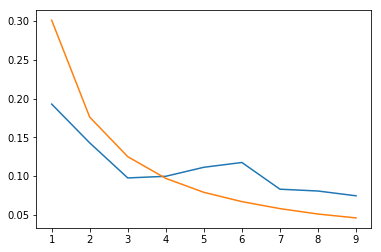

本福法则平方差为: 0.019481294012138124


In [6]:
# according https://www.zhihu.com/question/33540315

common_cnt = {
    "1":0.301,
    "2":0.176,
    "3":0.125,
    "4":0.097,
    "5":0.079,
    "6":0.067,
    "7":0.058,
    "8":0.051,
    "9":0.046
}

plt.plot(range(1,10),[numbers_cnt[str(i)] for i in range(1,10)])
plt.plot(range(1,10),[common_cnt[str(i)] for i in range(1,10)])
plt.show()

# 计算平方和
import math
sos = 0
for i in range(1,10):
    sos = sos + math.pow(common_cnt[str(i)]-numbers_cnt[str(i)],2)
print("本福法则平方差为: {}".format(sos))